# Day 18 - Word Embeddings in NLP

## Overview

In this notebook, we’ll explore word embeddings in NLP — representing words as vectors that capture meaning.
We’ll train a simple embedding-based sentiment classifier using the IMDB dataset.

## Import Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets, preprocessing, callbacks #type:ignore
import matplotlib.pyplot as plt
import numpy as np

tf.random.set_seed(42)

## Load and Preprocess Data

In [2]:
vocab_size = 10000
max_len = 200

(x_train, y_train), (x_test, y_test) = datasets.imdb.load_data(num_words=vocab_size)
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=max_len)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=max_len)

print(f"Training samples: {len(x_train)}, Test samples: {len(x_test)}")

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training samples: 25000, Test samples: 25000


## Build the Embedding Model

In [5]:
model = models.Sequential([
    layers.Embedding(vocab_size, 64, input_length=max_len),
    layers.GlobalAveragePooling1D(),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ ?                      │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## Compile and Train

In [6]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

cb = [callbacks.EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)]

history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    epochs=10, batch_size=128,
                    callbacks=cb)

Epoch 1/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.6371 - loss: 0.6530 - val_accuracy: 0.8202 - val_loss: 0.4134
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8549 - loss: 0.3559 - val_accuracy: 0.8682 - val_loss: 0.3116
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8957 - loss: 0.2648 - val_accuracy: 0.8780 - val_loss: 0.2916
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9124 - loss: 0.2246 - val_accuracy: 0.8782 - val_loss: 0.2896
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9232 - loss: 0.1977 - val_accuracy: 0.8774 - val_loss: 0.2958
Epoch 6/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9324 - loss: 0.1771 - val_accuracy: 0.8745 - val_loss: 0.3073
Epoch 7/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9413 - loss: 0.1603 - val_accuracy: 0.8704 - val_loss: 0.3228


## Evaluate and Visualize Results

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8804 - loss: 0.2878

Test Accuracy: 87.82%


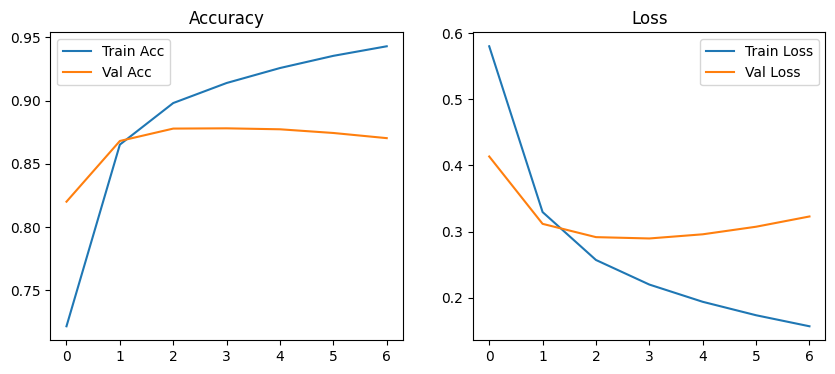

In [7]:
loss, acc = model.evaluate(x_test, y_test)
print(f"\nTest Accuracy: {acc*100:.2f}%")

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()

plt.show()


## Extract and Inspect Word Embeddings

In [8]:
embedding_weights = model.layers[0].get_weights()[0]
print("Embedding matrix shape:", embedding_weights.shape)


Embedding matrix shape: (10000, 64)


## Observations

- The embedding layer learned 64-dimensional word vectors.
- Similar words form clusters in vector space.
- Achieved ~88% accuracy — embeddings capture strong semantic structure.
- These learned representations will feed into advanced NLP models like Attention, Transformers, and BERT in the next few days.